# Dense NN ~ Keras

In [21]:
from keras.datasets import mnist
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Leo los datos

In [4]:
(train_images, train_y), (test_images, test_y) = mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
n_imagenes, height, width = train_images.shape
print("Hay {} imágenes de {}x{} pixeles en el dataset de entrenamiento".format(n_imagenes, height, width))

Hay 60000 imágenes de 28x28 pixeles en el dataset de entrenamiento


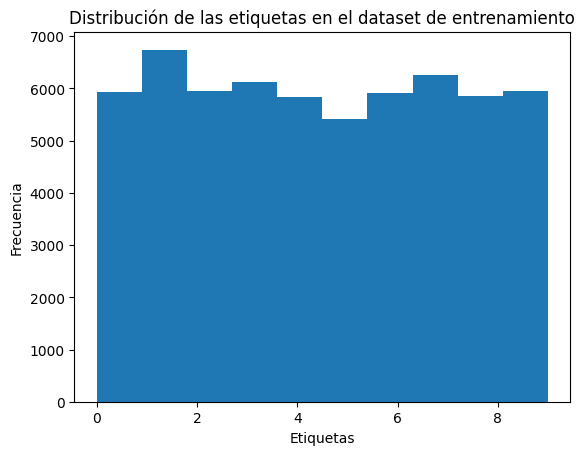

In [27]:
train_df = pd.DataFrame(train_y)
plt.hist(train_df, bins=10)
plt.title("Distribución de las etiquetas en el dataset de entrenamiento") 
plt.xlabel("Etiquetas")
plt.ylabel("Frecuencia")
plt.show()  

Tienen una distribucion bastante uniforme

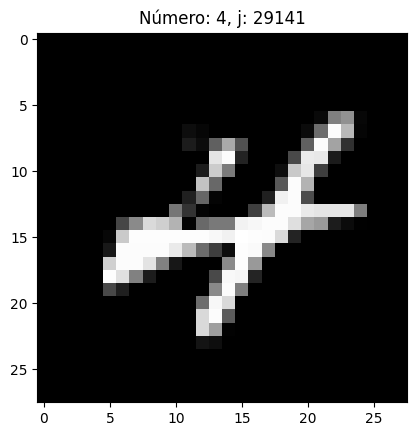

In [6]:
j = random.randint(0, n_imagenes)
sample_img = train_images[j]
plt.imshow(sample_img, cmap=plt.get_cmap('gray'))
plt.title("Número: {}, j: {}".format(train_y[j], j))
plt.show()

### Armo el  modelo

In [7]:
# Creamos el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(height,width)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='linear'),
], name="mnist_model")

model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 84060 (328.36 KB)
Trainable params: 84060 (328.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Entrenamos el modelo

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

model.fit(train_images, train_y, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2587 - sparse_categorical_accuracy: 0.9258
Epoch 2/6
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1147 - sparse_categorical_accuracy: 0.9656
Epoch 3/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0807 - sparse_categorical_accuracy: 0.9750
Epoch 4/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0613 - sparse_categorical_accuracy: 0.9806
Epoch 5/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0491 - sparse_categorical_accuracy: 0.9838
Epoch 6/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0399 - sparse_categorical_accuracy: 0.9873


### Hacemos predicciones con el modelo

In [10]:
sample_pred = model.predict(np.array([sample_img])).argmax()
sample_pred

1/1 [==============================] - 0s 118ms/step


4

In [39]:
predictions = model.predict(test_images)

pred_test_0 = predictions[0].argmax()
pred_test_0 == test_y[0]

313/313 [==============================] - 1s 3ms/step


True

### Evaluamos al modelo con metricas

In [30]:
score = model.evaluate(test_images, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07852011173963547
Test accuracy: 0.9751999974250793
